I am doing this task in google colab..

In [4]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7327/861871/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1623828793&Signature=kUy4pFeTrXoE7G3tv34sgyA7zgNRjQjs4wA5DZ%2FdC5EMm9yVNK91kBXGLImBFMs3A8YTBMnBiJI6tUJ5asdZvrAVtRJ0waRcarigv7GsH9C2UwZmGxkr1SSnwl3cJIwVaF28b0s3W8BHROZ994g7LMKtWtJ4ZVe7Q%2Bs5IpZfkit6nxj%2BL7gDAtgbcWQ5TKfCVUHTZWO%2FFzvP7WmU%2B2qOON%2BHzjhWdryAQPqdvK891czLo9H8yVbqgA%2B7HjcnmoQuvKUcHFlIW6tvnKNLfGzUg8xZce%2Fc4MNITT8rHFsUgfy6zhSlYDUWh49ikyuaUa8JxNtI6Z1vEPoIryzZ8lGQRw%3D%3D&response-content-disposition=attachment%3B+filename%3Ddog-breed-identification.zip" -c -O 'dog-breed-identification.zip'

--2021-06-15 04:15:05--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7327/861871/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1623828793&Signature=kUy4pFeTrXoE7G3tv34sgyA7zgNRjQjs4wA5DZ%2FdC5EMm9yVNK91kBXGLImBFMs3A8YTBMnBiJI6tUJ5asdZvrAVtRJ0waRcarigv7GsH9C2UwZmGxkr1SSnwl3cJIwVaF28b0s3W8BHROZ994g7LMKtWtJ4ZVe7Q%2Bs5IpZfkit6nxj%2BL7gDAtgbcWQ5TKfCVUHTZWO%2FFzvP7WmU%2B2qOON%2BHzjhWdryAQPqdvK891czLo9H8yVbqgA%2B7HjcnmoQuvKUcHFlIW6tvnKNLfGzUg8xZce%2Fc4MNITT8rHFsUgfy6zhSlYDUWh49ikyuaUa8JxNtI6Z1vEPoIryzZ8lGQRw%3D%3D&response-content-disposition=attachment%3B+filename%3Ddog-breed-identification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 724495926 (691M) [application/zip]
Saving to: ‘dog-breed-

In [45]:
#Importing some modules.. which is used in the later section

from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense,Conv2D,MaxPooling2D
import pandas as pd
import numpy as np
from tensorflow.keras import backend as K

In [6]:
#Checking if the GPU is available or not.

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!unzip dog-breed-identification.zip

In [9]:
ls

dog-breed-identification.zip  sample_data/           test/
labels.csv                    sample_submission.csv  train/


In [62]:
# Clearning all the earlier session of tenserflow
tf.keras.backend.clear_session()

In [63]:
#Reading labels.csv in pandas
labels = pd.read_csv('labels.csv')

In [64]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [65]:
# Here i am defining a function which will take id and concatinate .jpg into t
def change_name_2_jpg(x):
  return x+".jpg"

In [66]:
labels['id'] = labels['id'].apply(change_name_2_jpg)

In [67]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


In [68]:
# It was mentioned in the task that we have to do the prediction for these 10 breed only.
# Thus i am storing the names of breed in a list
target_breed = ["beagle", "chihuahua", "doberman",
                "french_bulldog", "golden_retriever", "malamute", "pug", "saint_bernard", "scottish_deerhound",
                "tibetan_mastiff"]

In [69]:
# Droping all the rows of the csv file whose breed is not in our target breed.
labels = labels[labels['breed'].isin(target_breed)]

In [70]:
list1 = list(set(labels['breed']))

In [71]:
labels.head()

,id,breed
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever
9,0042188c895a2f14ef64a918ed9c7b64.jpg,scottish_deerhound
20,008b1271ed1addaccf93783b39deab45.jpg,doberman
25,00a366d4b4a9bbb6c8a63126697b7656.jpg,golden_retriever
37,0100f55e4f0fe28f2c0465d3fc4b9897.jpg,golden_retriever


In [72]:
len(list(labels['id'])) # Checking the length of the csv or the data we have after dropping all those unnecessary column

841

In [73]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.1,rotation_range=20,
      zoom_range=0.25,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.15)
# Calling ImageDataGenerator class with adding some image agumentation inputs along with validation-split

In [74]:
"""datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.1)"""

'datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.1)'

In [75]:
train_generator=datagen.flow_from_dataframe(
        dataframe=labels,
        directory="./train/",
        x_col="id",
        y_col="breed",
        subset="training" ,
        batch_size=32,
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=(256,256))

# Here we are using flow from dataframe method to generate training datapoints in batches with batch size 32.
# This is the reason why we have added .jpg to the "id" column in our csv file.
# Here we are ensuring that training data generation will be random by giving suffle as true

Found 757 validated image filenames belonging to 10 classes.


In [76]:
valid_generator=datagen.flow_from_dataframe(
      dataframe=labels,
      directory="./train/",
      x_col="id",
      y_col="breed",
      subset="validation",
      batch_size=32,
      seed=42,
      shuffle=True,
      class_mode="categorical",
      target_size=(256,256))
# Same thing what we have done for training data

Found 84 validated image filenames belonging to 10 classes.


In [77]:
len(train_generator[1][0])
#Just checking the size of batch.. we are getting correct output as 32

32

(32, 256, 256, 3)


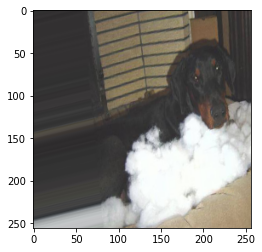

(32, 256, 256, 3)


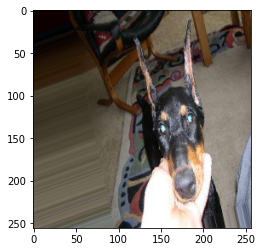

(20, 256, 256, 3)


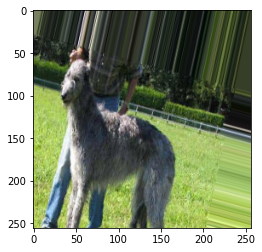

(32, 256, 256, 3)


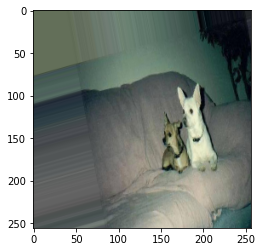

(32, 256, 256, 3)


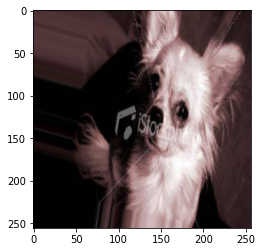

(20, 256, 256, 3)


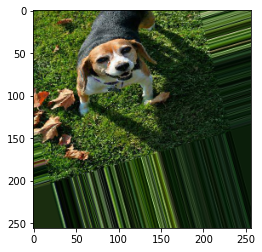

(32, 256, 256, 3)


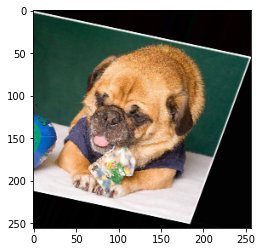

(32, 256, 256, 3)


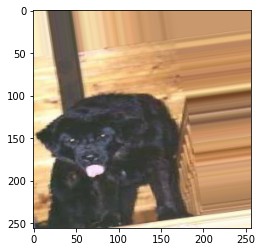

(20, 256, 256, 3)


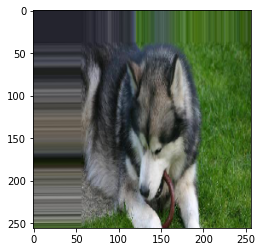

(32, 256, 256, 3)


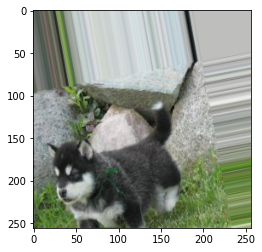

In [78]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

for _ in range(10,20):
    img, label = valid_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()
# Checking 10 images at random from different batches    

In [ ]:
model = applications.resnet50.ResNet50(weights = "imagenet", include_top=False, input_shape= (256, 256, 3))
# Calling Resnet50 model with input shape same as our image shape
model.summary()
# Printng model summary

In [ ]:
for layer in model.layers:
  layer.trainable = False
# Ensuring that the layers of resnet50 will not be trained i.e, their weights will remain same  
for layer in model.layers:
  print(layer, layer.trainable)

In [81]:
modell=model.output
modell=Flatten()(modell) #Falttening the model output of resnet
modell=Dense(256, activation="relu")(modell) #Passing the faltten output to a dense layer of 256 neurons
modell=Dense(64,activation="relu")(modell) #passing the dense layer output again into a dense layer of 64 neurons
modell=Dense(10,activation="softmax")(modell) # At last passing the above neuron output to a softamx layer of 10 neurons
final_model=Model(inputs = model.input, outputs = modell)
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [82]:
from tensorflow.keras.callbacks import LearningRateScheduler,ModelCheckpoint,ReduceLROnPlateau
#importing some modules to improve the training process

In [83]:
#Saving model after every epochs if validation accuracy is increased.
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

In [84]:
#Function to decay learning rate by 5% after every 3 epoch.
def changeLearningRate(epoch,lrr):
  changed_lr=lrr
  changed_lr=(changed_lr)*(0.95**((1+epoch)//3))
  return changed_lr

In [85]:
lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)

In [86]:
#Function to reduce learning rate by 10% if our validation accuracy at this epoch is less than the previous epoch.
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.9,patience=1, min_lr=0.0009,mode='auto',min_delta=0.0001,cooldown=0)

In [87]:
#This is a additional callback function i have written to print learning rate after each epoch.
class lr_show(tf.keras.callbacks.Callback):
  def __init__(self, model):
    self.model=model
  def on_epoch_end(self, epoch, logs={}):
    print("\n")
    print("Learning rate is",K.eval(self.model.optimizer.lr))

In [88]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [89]:
import tensorflow as tf
import datetime

In [90]:
!rm -rf ./logs/ #Removing the previous logs

In [91]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)

In [93]:
final_model.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=["accuracy"])
# Compiling the model with specifing the loss.. the optimizer and the metrices we are using

In [94]:
show_learning_rate=lr_show(model) # intializing the learning rate sheduler class.. which will print the learning rate after each iteration
callback_list = [checkpoint,lrschedule,reduce_lr,show_learning_rate,tensorboard_callback]

In [95]:
final_model.fit_generator(
train_generator,
epochs = 30,validation_data = valid_generator,callbacks=callback_list)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/30

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0008999999845400453.
24/24 [==============================] - 18s 637ms/step - loss: 7.3386 - accuracy: 0.1096 - val_loss: 4.8021 - val_accuracy: 0.0952

Epoch 00001: val_accuracy improved from -inf to 0.09524, saving model to model_save/weights-01-0.0952.hdf5


Learning rate is 0.0009
Epoch 2/30

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0008999999845400453.
24/24 [==============================] - 13s 554ms/step - loss: 3.2308 - accuracy: 0.1361 - val_loss: 3.0754 - val_accuracy: 0.0952

Epoch 00002: val_accuracy did not improve from 0.09524


Learning rate is 0.0009
Epoch 3/30

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0008549999853130429.
24/24 [==============================] - 13s 552ms/step - loss: 3.0305 - accuracy: 0.1466 - val_loss: 3.0071 - val_accuracy: 0.1190

Epoch 00003: val_accuracy improved from 0.09524 to 0.11905, saving model to model_save/weights-03-0

In [ ]:
%tensorboard --logdir logs/fit

In [143]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot from 2021-06-15 11-59-31.png to Screenshot from 2021-06-15 11-59-31.png


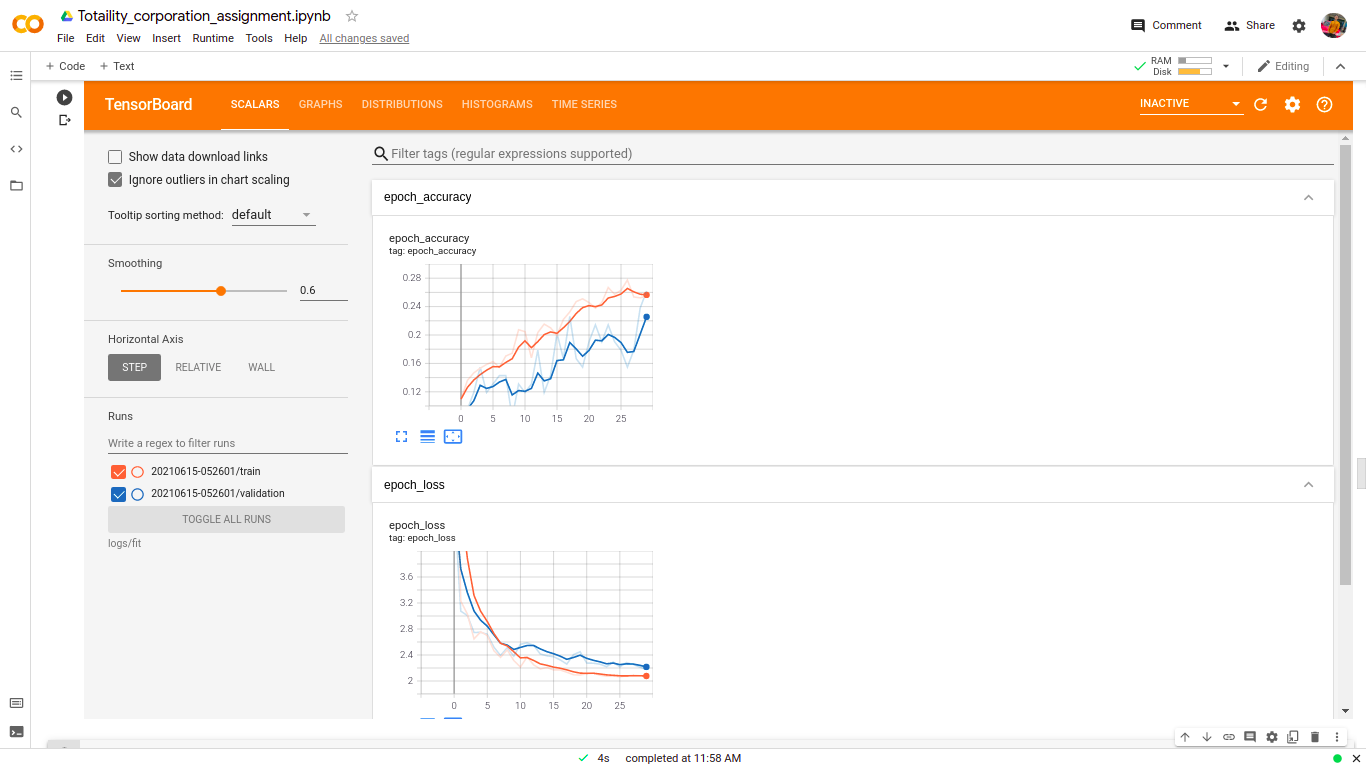

In [144]:
from IPython.display import Image
Image(filename='Screenshot from 2021-06-15 11-59-31.png')
#Plotting the tenserboard plot for both accuracy and loss for validation and train data

In [107]:
final_model.load_weights('model_save/weights-30-0.2619.hdf5') #Loding the weights when our model validation accuracy was maximum

In [108]:
final_model.metrics_names

['loss', 'accuracy']

[[6.3324382e-04 1.4552029e-04 3.4437437e-06 8.4524280e-01 2.7170373e-07
  1.0551187e-01 2.1008626e-04 1.5323405e-04 4.8092153e-02 7.2843177e-06]]


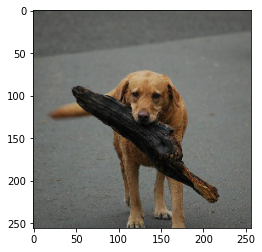

In [109]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input


# Just checking the prediction for one image along with ploting that image

img_path = "./train/"+list(labels['id'])[0]
img = image.load_img(img_path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
y = final_model.predict(x)
print(y)
plt.imshow(img)

In [110]:
breed_to_number = train_generator.class_indices
breed_to_number
#preparing a dictionary which will have breed name along with corresponding integer value associated with them

{'beagle': 0,
 'chihuahua': 1,
 'doberman': 2,
 'french_bulldog': 3,
 'golden_retriever': 4,
 'malamute': 5,
 'pug': 6,
 'saint_bernard': 7,
 'scottish_deerhound': 8,
 'tibetan_mastiff': 9}



*   From here may be i will be wrong.
*   From here we have to calcaulate all the metrices score on test data.
*   But it the test data which i got doesn't contain any labels.
*   So i am calculating all those score on the train data..
*   Thus it may be possible that i am wrong here



In [111]:
from tqdm import tqdm_notebook as tqdm
correct = 0 # This correct variale will store the number of correctly preicted class
total = 0 # This total number of data points
y_label = []
y_pred = []
# Here we are storing the predicted class and also the real class of those breed to compare the accuracy
for i,j in tqdm(zip(labels['id'],labels['breed'])):
  img_path = "./train/"+i
  img = image.load_img(img_path, target_size=(256,256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  y = final_model.predict(x)
  ind = np.argmax(y,axis = 1)
  y_label.append(breed_to_number[j])
  y_pred.append(ind[0])
  if(ind[0]==breed_to_number[j]):
    correct+=1 #Incrementing the count if the prediction class matches to the actual output
  total+=1  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [112]:
print(correct,total)

81 841


In [131]:
print("Accuracy is",(correct/total)*100)

Accuracy is 9.63139120095125


In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_label, y_pred)  #Creating confusion matrix with the help of sklearn library

array([[ 2,  0,  6, 75,  0,  5, 17,  0,  0,  0],
       [ 3,  0, 11, 33,  0,  0, 23,  0,  1,  0],
       [ 1,  0, 19, 42,  0,  0, 10,  0,  2,  0],
       [ 2,  0, 25, 19,  0,  0, 23,  0,  0,  1],
       [ 3,  0, 16, 22,  0, 10,  7,  0,  9,  0],
       [ 5,  0, 28, 14,  0,  6, 28,  0,  0,  0],
       [ 1,  0, 19, 39,  0,  0, 35,  0,  0,  0],
       [ 1,  0, 21, 35,  0,  0, 24,  0,  3,  0],
       [ 3,  0,  1, 79,  0,  0, 43,  0,  0,  0],
       [ 0,  0, 27, 28,  0,  2, 11,  0,  1,  0]])

In [133]:
#https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_04_2_multi_class.ipynb
#Code to plot confusion matix
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 2  0  6 75  0  5 17  0  0  0]
 [ 3  0 11 33  0  0 23  0  1  0]
 [ 1  0 19 42  0  0 10  0  2  0]
 [ 2  0 25 19  0  0 23  0  0  1]
 [ 3  0 16 22  0 10  7  0  9  0]
 [ 5  0 28 14  0  6 28  0  0  0]
 [ 1  0 19 39  0  0 35  0  0  0]
 [ 1  0 21 35  0  0 24  0  3  0]
 [ 3  0  1 79  0  0 43  0  0  0]
 [ 0  0 27 28  0  2 11  0  1  0]]
Normalized confusion matrix
[[0.02 0.   0.06 0.71 0.   0.05 0.16 0.   0.   0.  ]
 [0.04 0.   0.15 0.46 0.   0.   0.32 0.   0.01 0.  ]
 [0.01 0.   0.26 0.57 0.   0.   0.14 0.   0.03 0.  ]
 [0.03 0.   0.36 0.27 0.   0.   0.33 0.   0.   0.01]
 [0.04 0.   0.24 0.33 0.   0.15 0.1  0.   0.13 0.  ]
 [0.06 0.   0.35 0.17 0.   0.07 0.35 0.   0.   0.  ]
 [0.01 0.   0.2  0.41 0.   0.   0.37 0.   0.   0.  ]
 [0.01 0.   0.25 0.42 0.   0.   0.29 0.   0.04 0.  ]
 [0.02 0.   0.01 0.63 0.   0.   0.34 0.   0.   0.  ]
 [0.   0.   0.39 0.41 0.   0.03 0.16 0.   0.01 0.  ]]


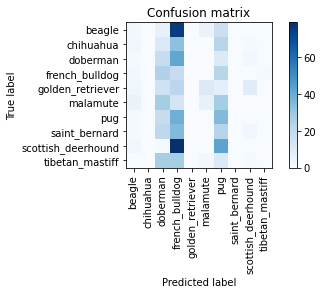

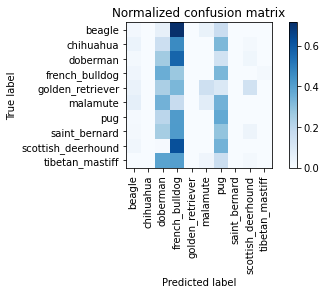

In [135]:
#https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_04_2_multi_class.ipynb

labels_names = list(breed_to_number.keys())
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#Here first we are plotting confusion matrix for mutli class label and then we are plotting Normalized version of that confusion matrix.

# Compute confusion matrix
cm = confusion_matrix(y_label, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels_names)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels_names, 
        title='Normalized confusion matrix')

plt.show()

In [138]:
#Print the f1 score of prediction f1 score = (2*precision*recall)/(precision+recall)
from sklearn.metrics import confusion_matrix, f1_score,roc_auc_score 
f1 = f1_score(y_label, y_pred,average='micro')

print("Micro_F1 score of Validation Data is",f1)



Micro_F1 score of Validation Data is 0.09631391200951248


In [139]:
import sys
batch_size = 32

def true_and_predicted_labels(dataset):
    labels = np.zeros((dataset.n,10))
    preds = np.zeros_like(labels)
    for i in range(len(dataset)):
        batch = dataset[i]
        batch_images = batch[0]
        batch_labels = batch[1]
        batch_preds = final_model.predict(batch_images)
        start = i*batch_size
        labels[start:start+batch_size] = batch_labels
        preds[start:start+batch_size] = batch_preds
    return labels, preds

train_labels, train_preds = true_and_predicted_labels(train_generator)

In [140]:
train_generator.n
# Number of data points in train generator

757

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


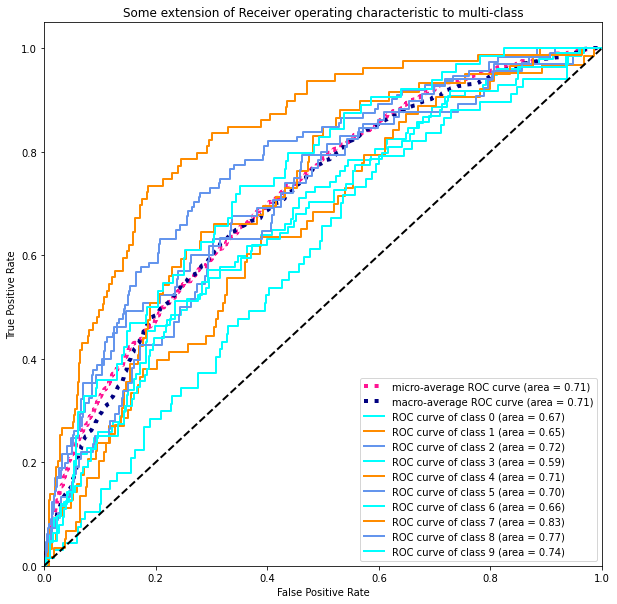

In [141]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes = 10

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(train_labels[:, i], train_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(train_labels.ravel(), train_preds.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1,figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()




Here the accuracy or f1 - score or the roc auc score is not that much exciting. But i have tried all the possible modification that i can do..like playing with learning rates..or making some of the last layer of resnet traininable..or playing with the input of data-agumentation.
This is the maximum accuracy i have got


It may be due to less number of data points.. because i am only consdering those data points whose breed is equal to our targeted breed prediction